In [6]:
from imports import *
init_notebook_mode(connected=True) 
import plotly_grapher as pg
import ipywidgets as widgets

def update_plot(transformation,limit_range,ticks,function):
    
    limit_range = limit_range
    fine = 100
    ticks = ticks
    Z = eval(function)

    pg.graph(z=Z , limit_range= limit_range ,ticks =  ticks , fine = fine , frame = transformation)
       
transformation = widgets.FloatSlider(min = 0 , max = 1 , value = 1)
limit_range = widgets.FloatSlider(min = 0.1 , max = 10 , value = 2)
ticks = widgets.IntSlider(min = 2 , max = 40 , value = 11)
function = widgets.Text( value = 'z' , description='w : ')
    
interactive_plot = widgets.interactive(update_plot , transformation = transformation , limit_range = limit_range , ticks = ticks , function = function )
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='transformation', max=1.0), FloatSlider(value=2.0, de…

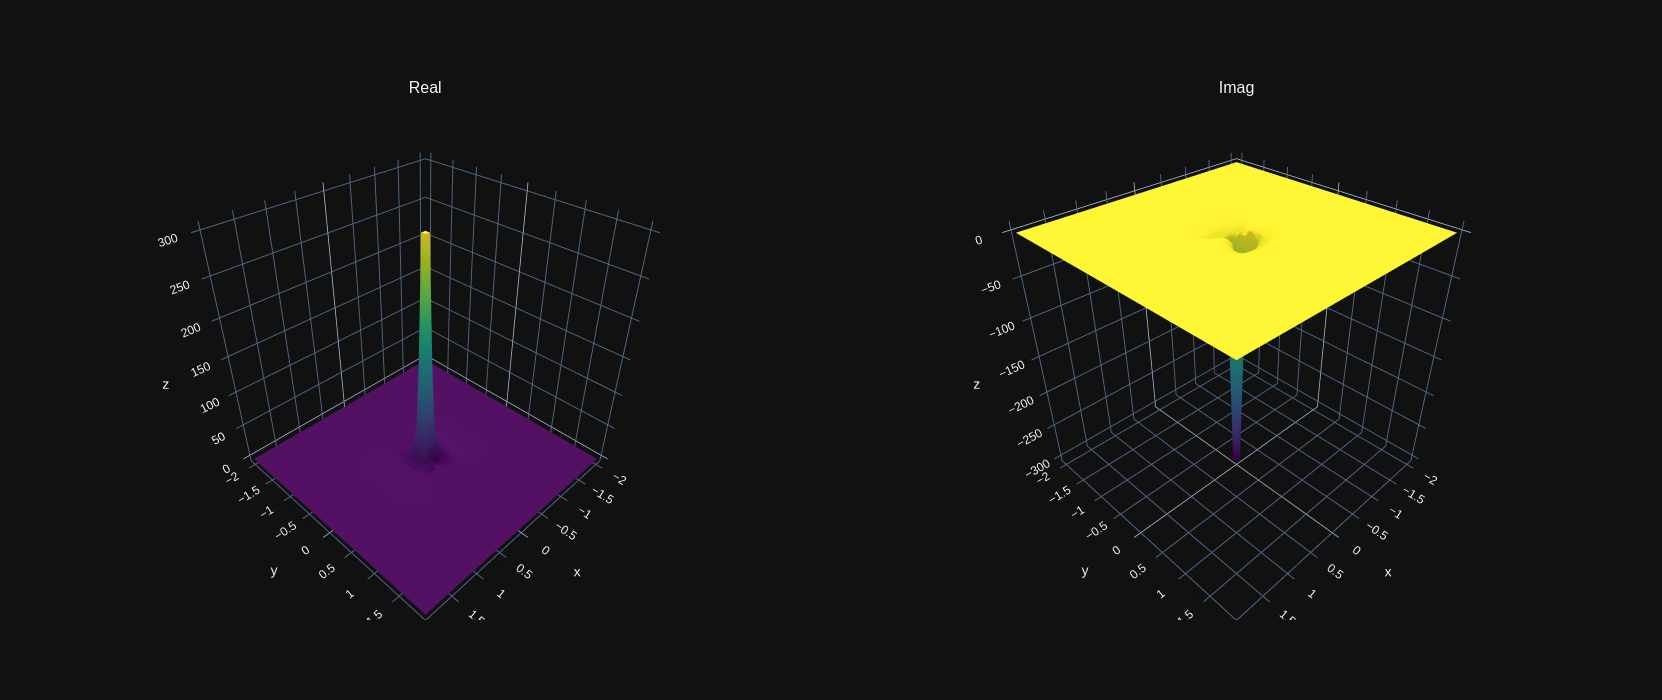

In [3]:
from imports import *
from symbolic_conversion import w_numeric
init_notebook_mode(connected=True) 
from plotly.subplots import make_subplots

fig = make_subplots(
    rows = 1 ,cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}]],
    subplot_titles=('Real','Imag'),
    horizontal_spacing = 0.08
)

limit_range_px = 2
limit_range_nx = 2
limit_range_py = 2
limit_range_ny = 2

fine = 50


Z =1/(a**2+I*b**2)



x,y = np.meshgrid(np.linspace(-1*limit_range_nx , limit_range_px , fine),np.linspace(-1*limit_range_ny , limit_range_py , fine))

Real,Imag = w_numeric(Z)

fig.add_trace(
    go.Surface(x=x, y=y, z=Real(x,y), colorscale='Viridis', showscale=False,hoverinfo='none'),
    row=1, col=1)

fig.add_trace(
    go.Surface(x=x, y=y, z=Imag(x,y), colorscale='Viridis', showscale=False,hoverinfo='none'),
    row=1, col=2)



# fig = go.Figure(data=[go.Surface(z=Real(x,y), x=x, y=y)])
# fig.update_layout(title='Real Part',
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=10, t=80))

fig.update_layout(height=700, width=1100,
                 template='plotly_dark',
                 )

config = {'responsive': False,'scrollZoom': True,
    'displayModeBar': True,
    'editable': True}

fig.show(config=config)